In [1]:
#assignment-07
#

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Fish.csv')

In [4]:
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

<AxesSubplot:>

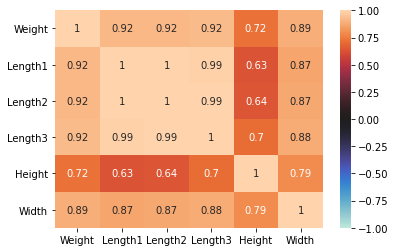

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,vmin=-1,vmax=1,center=0)

In [8]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
dataset['Species']=le.fit_transform(dataset['Species'])

In [11]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
x=dataset.iloc[:,1:7]
y=dataset.iloc[:,0:1]

In [13]:
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [14]:
x.ndim

2

In [15]:
x.shape

(159, 6)

In [16]:
y.shape

(159, 1)

In [19]:
x=dataset.iloc[:,1:7].values
y=dataset.iloc[:,0:1].values

In [18]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()

In [23]:
y=one.fit_transform(y[:,0:1])

In [41]:
y = y.toarray()

In [42]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
y.shape


(159, 7)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [47]:
categorical = Sequential()

In [48]:
categorical.add(Dense(units = 6 , kernel_initializer = "random_uniform",activation ="relu"))

In [49]:
categorical.add(Dropout(0.2))

In [50]:
categorical.add(Dense(units = 12 , kernel_initializer = "random_uniform",activation ="relu"))

In [51]:
categorical.add(Dropout(0.2))


In [52]:
categorical.add(Dense(units = 12 , kernel_initializer = "random_uniform",activation ="relu"))


In [53]:
categorical.add(Dropout(0.2))

In [54]:
categorical.add(Dense(units = 12 , kernel_initializer = "random_uniform",activation ="relu"))

In [55]:
categorical.add(Dense(units = 7 , kernel_initializer = "random_uniform",activation ="softmax"))

In [56]:
categorical.compile(optimizer = "rmsprop",loss="categorical_crossentropy" ,metrics = ["accuracy"])

In [57]:
history = categorical.fit(x_train,y_train, batch_size =128,epochs = 1000, validation_data = (x_test,y_test))

Epoch 1/1000
1/1 [==============================] - 1s 857ms/step - loss: 1.9459 - accuracy: 0.2126 - val_loss: 1.9446 - val_accuracy: 0.1875
Epoch 2/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9437 - accuracy: 0.2283 - val_loss: 1.9436 - val_accuracy: 0.1875
Epoch 3/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.9420 - accuracy: 0.2283 - val_loss: 1.9428 - val_accuracy: 0.1875
Epoch 4/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9406 - accuracy: 0.2283 - val_loss: 1.9420 - val_accuracy: 0.1875
Epoch 5/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9392 - accuracy: 0.2283 - val_loss: 1.9412 - val_accuracy: 0.1875
Epoch 6/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.9379 - accuracy: 0.2283 - val_loss: 1.9405 - val_accuracy: 0.1875
Epoch 7/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9366 - accuracy: 0.2283 - val_loss: 1.9397 - val_accuracy: 0.1875
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8063 - accuracy: 0.3701 - val_loss: 1.8790 - val_accuracy: 0.2812
Epoch 60/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8069 - accuracy: 0.3701 - val_loss: 1.8782 - val_accuracy: 0.2812
Epoch 61/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8059 - accuracy: 0.3701 - val_loss: 1.8771 - val_accuracy: 0.2812
Epoch 62/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8017 - accuracy: 0.3701 - val_loss: 1.8762 - val_accuracy: 0.2812
Epoch 63/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.7916 - accuracy: 0.3701 - val_loss: 1.8753 - val_accuracy: 0.2812
Epoch 64/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7867 - accuracy: 0.3701 - val_loss: 1.8743 - val_accuracy: 0.2812
Epoch 65/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7870 - accuracy: 0.3701 - val_loss: 1.8731 - val_accuracy: 0.2812
Epoch 

1/1 [==============================] - 0s 41ms/step - loss: 1.6525 - accuracy: 0.3701 - val_loss: 1.8559 - val_accuracy: 0.2812
Epoch 117/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6443 - accuracy: 0.3701 - val_loss: 1.8561 - val_accuracy: 0.2812
Epoch 118/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6526 - accuracy: 0.3701 - val_loss: 1.8555 - val_accuracy: 0.2812
Epoch 119/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.6785 - accuracy: 0.3701 - val_loss: 1.8533 - val_accuracy: 0.2812
Epoch 120/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.6404 - accuracy: 0.3701 - val_loss: 1.8526 - val_accuracy: 0.2812
Epoch 121/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6430 - accuracy: 0.3701 - val_loss: 1.8521 - val_accuracy: 0.2812
Epoch 122/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6613 - accuracy: 0.3701 - val_loss: 1.8492 - val_accuracy: 0.2812
Epoch 123/1000

1/1 [==============================] - 0s 38ms/step - loss: 1.5766 - accuracy: 0.3622 - val_loss: 1.8211 - val_accuracy: 0.2812
Epoch 174/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5578 - accuracy: 0.3858 - val_loss: 1.8207 - val_accuracy: 0.2812
Epoch 175/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5857 - accuracy: 0.4016 - val_loss: 1.8165 - val_accuracy: 0.2812
Epoch 176/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5813 - accuracy: 0.4252 - val_loss: 1.8162 - val_accuracy: 0.3125
Epoch 177/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5633 - accuracy: 0.4488 - val_loss: 1.8204 - val_accuracy: 0.2812
Epoch 178/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5524 - accuracy: 0.4409 - val_loss: 1.8192 - val_accuracy: 0.2812
Epoch 179/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5734 - accuracy: 0.4567 - val_loss: 1.8154 - val_accuracy: 0.2812
Epoch 180/1000

1/1 [==============================] - 0s 37ms/step - loss: 1.5216 - accuracy: 0.4724 - val_loss: 1.7861 - val_accuracy: 0.2812
Epoch 231/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5046 - accuracy: 0.4252 - val_loss: 1.7883 - val_accuracy: 0.2812
Epoch 232/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5301 - accuracy: 0.4252 - val_loss: 1.7863 - val_accuracy: 0.3125
Epoch 233/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5279 - accuracy: 0.4331 - val_loss: 1.7821 - val_accuracy: 0.3125
Epoch 234/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5272 - accuracy: 0.4331 - val_loss: 1.7795 - val_accuracy: 0.3125
Epoch 235/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5194 - accuracy: 0.4646 - val_loss: 1.7853 - val_accuracy: 0.2812
Epoch 236/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5551 - accuracy: 0.4646 - val_loss: 1.7797 - val_accuracy: 0.2812
Epoch 237/1000

1/1 [==============================] - 0s 43ms/step - loss: 1.5007 - accuracy: 0.4252 - val_loss: 1.7511 - val_accuracy: 0.3125
Epoch 288/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4852 - accuracy: 0.4409 - val_loss: 1.7526 - val_accuracy: 0.3125
Epoch 289/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4750 - accuracy: 0.4724 - val_loss: 1.7538 - val_accuracy: 0.3125
Epoch 290/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5045 - accuracy: 0.4331 - val_loss: 1.7474 - val_accuracy: 0.3125
Epoch 291/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5008 - accuracy: 0.4252 - val_loss: 1.7448 - val_accuracy: 0.3125
Epoch 292/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4768 - accuracy: 0.4331 - val_loss: 1.7484 - val_accuracy: 0.3438
Epoch 293/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4608 - accuracy: 0.4567 - val_loss: 1.7428 - val_accuracy: 0.3125
Epoch 294/1000

1/1 [==============================] - 0s 42ms/step - loss: 1.4523 - accuracy: 0.4724 - val_loss: 1.6985 - val_accuracy: 0.3438
Epoch 345/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.4799 - accuracy: 0.4409 - val_loss: 1.6961 - val_accuracy: 0.3438
Epoch 346/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4611 - accuracy: 0.4567 - val_loss: 1.6908 - val_accuracy: 0.3438
Epoch 347/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3862 - accuracy: 0.4724 - val_loss: 1.6955 - val_accuracy: 0.3438
Epoch 348/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.4601 - accuracy: 0.4409 - val_loss: 1.6943 - val_accuracy: 0.3438
Epoch 349/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4464 - accuracy: 0.4409 - val_loss: 1.6886 - val_accuracy: 0.3438
Epoch 350/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4563 - accuracy: 0.4331 - val_loss: 1.6889 - val_accuracy: 0.3438
Epoch 351/1000

1/1 [==============================] - 0s 39ms/step - loss: 1.3561 - accuracy: 0.5039 - val_loss: 1.6325 - val_accuracy: 0.3750
Epoch 402/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3923 - accuracy: 0.4961 - val_loss: 1.6315 - val_accuracy: 0.3750
Epoch 403/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3747 - accuracy: 0.5039 - val_loss: 1.6348 - val_accuracy: 0.3750
Epoch 404/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4305 - accuracy: 0.4252 - val_loss: 1.6250 - val_accuracy: 0.3750
Epoch 405/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3697 - accuracy: 0.5039 - val_loss: 1.6233 - val_accuracy: 0.3750
Epoch 406/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3913 - accuracy: 0.4488 - val_loss: 1.6203 - val_accuracy: 0.3750
Epoch 407/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4035 - accuracy: 0.4882 - val_loss: 1.6180 - val_accuracy: 0.3750
Epoch 408/1000

1/1 [==============================] - 0s 36ms/step - loss: 1.3336 - accuracy: 0.5118 - val_loss: 1.5858 - val_accuracy: 0.3750
Epoch 459/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3280 - accuracy: 0.5118 - val_loss: 1.5865 - val_accuracy: 0.3750
Epoch 460/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3346 - accuracy: 0.5197 - val_loss: 1.5872 - val_accuracy: 0.3750
Epoch 461/1000
1/1 [==============================] - ETA: 0s - loss: 1.3184 - accuracy: 0.51 - 0s 37ms/step - loss: 1.3184 - accuracy: 0.5118 - val_loss: 1.5880 - val_accuracy: 0.3750
Epoch 462/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3152 - accuracy: 0.5118 - val_loss: 1.5843 - val_accuracy: 0.3750
Epoch 463/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3382 - accuracy: 0.5512 - val_loss: 1.5820 - val_accuracy: 0.3750
Epoch 464/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3005 - accuracy: 0.5354 - val_loss: 1.

1/1 [==============================] - 0s 37ms/step - loss: 1.2930 - accuracy: 0.5354 - val_loss: 1.5768 - val_accuracy: 0.4375
Epoch 516/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2584 - accuracy: 0.5669 - val_loss: 1.5704 - val_accuracy: 0.4375
Epoch 517/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2314 - accuracy: 0.5748 - val_loss: 1.5743 - val_accuracy: 0.4062
Epoch 518/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2748 - accuracy: 0.5354 - val_loss: 1.5676 - val_accuracy: 0.4375
Epoch 519/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2751 - accuracy: 0.5354 - val_loss: 1.5700 - val_accuracy: 0.4062
Epoch 520/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2802 - accuracy: 0.5433 - val_loss: 1.5689 - val_accuracy: 0.4375
Epoch 521/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2817 - accuracy: 0.5354 - val_loss: 1.5704 - val_accuracy: 0.4062
Epoch 522/1000

1/1 [==============================] - 0s 41ms/step - loss: 1.2817 - accuracy: 0.5197 - val_loss: 1.5566 - val_accuracy: 0.4375
Epoch 573/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2183 - accuracy: 0.5433 - val_loss: 1.5445 - val_accuracy: 0.4375
Epoch 574/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2097 - accuracy: 0.5669 - val_loss: 1.5495 - val_accuracy: 0.4375
Epoch 575/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1829 - accuracy: 0.5512 - val_loss: 1.5468 - val_accuracy: 0.4375
Epoch 576/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1996 - accuracy: 0.5669 - val_loss: 1.5442 - val_accuracy: 0.4375
Epoch 577/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1948 - accuracy: 0.5433 - val_loss: 1.5332 - val_accuracy: 0.4375
Epoch 578/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2366 - accuracy: 0.5354 - val_loss: 1.5386 - val_accuracy: 0.4375
Epoch 579/1000

1/1 [==============================] - 0s 45ms/step - loss: 1.1484 - accuracy: 0.5827 - val_loss: 1.4912 - val_accuracy: 0.4688
Epoch 630/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2468 - accuracy: 0.5276 - val_loss: 1.4935 - val_accuracy: 0.4688
Epoch 631/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1543 - accuracy: 0.5669 - val_loss: 1.4941 - val_accuracy: 0.4688
Epoch 632/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1492 - accuracy: 0.5827 - val_loss: 1.4920 - val_accuracy: 0.4688
Epoch 633/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1308 - accuracy: 0.5748 - val_loss: 1.4909 - val_accuracy: 0.4688
Epoch 634/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1408 - accuracy: 0.5669 - val_loss: 1.4870 - val_accuracy: 0.4688
Epoch 635/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1402 - accuracy: 0.5669 - val_loss: 1.4871 - val_accuracy: 0.4688
Epoch 636/1000

1/1 [==============================] - 0s 46ms/step - loss: 1.0784 - accuracy: 0.5827 - val_loss: 1.3867 - val_accuracy: 0.4688
Epoch 687/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1282 - accuracy: 0.5827 - val_loss: 1.3925 - val_accuracy: 0.4688
Epoch 688/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1232 - accuracy: 0.5748 - val_loss: 1.3908 - val_accuracy: 0.4688
Epoch 689/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0986 - accuracy: 0.5827 - val_loss: 1.3816 - val_accuracy: 0.4688
Epoch 690/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0735 - accuracy: 0.5906 - val_loss: 1.3731 - val_accuracy: 0.4688
Epoch 691/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0907 - accuracy: 0.5827 - val_loss: 1.3717 - val_accuracy: 0.4688
Epoch 692/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1171 - accuracy: 0.5748 - val_loss: 1.3722 - val_accuracy: 0.4688
Epoch 693/1000

1/1 [==============================] - 0s 39ms/step - loss: 1.0543 - accuracy: 0.5827 - val_loss: 1.3606 - val_accuracy: 0.4688
Epoch 744/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0843 - accuracy: 0.5669 - val_loss: 1.3554 - val_accuracy: 0.4688
Epoch 745/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0380 - accuracy: 0.5669 - val_loss: 1.3414 - val_accuracy: 0.4688
Epoch 746/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0024 - accuracy: 0.5906 - val_loss: 1.3464 - val_accuracy: 0.4688
Epoch 747/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0305 - accuracy: 0.5906 - val_loss: 1.3438 - val_accuracy: 0.4688
Epoch 748/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0733 - accuracy: 0.5827 - val_loss: 1.3541 - val_accuracy: 0.4688
Epoch 749/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0387 - accuracy: 0.5827 - val_loss: 1.3676 - val_accuracy: 0.4688
Epoch 750/1000

1/1 [==============================] - 0s 35ms/step - loss: 0.9707 - accuracy: 0.5984 - val_loss: 1.2984 - val_accuracy: 0.4688
Epoch 801/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0211 - accuracy: 0.5748 - val_loss: 1.3085 - val_accuracy: 0.4688
Epoch 802/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0734 - accuracy: 0.5748 - val_loss: 1.3205 - val_accuracy: 0.4688
Epoch 803/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0164 - accuracy: 0.5827 - val_loss: 1.3084 - val_accuracy: 0.4688
Epoch 804/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0267 - accuracy: 0.5669 - val_loss: 1.3048 - val_accuracy: 0.4688
Epoch 805/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0428 - accuracy: 0.5669 - val_loss: 1.2971 - val_accuracy: 0.4688
Epoch 806/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0117 - accuracy: 0.5827 - val_loss: 1.2833 - val_accuracy: 0.4688
Epoch 807/1000

1/1 [==============================] - 0s 43ms/step - loss: 0.9405 - accuracy: 0.5984 - val_loss: 1.2397 - val_accuracy: 0.5312
Epoch 858/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9814 - accuracy: 0.5827 - val_loss: 1.2397 - val_accuracy: 0.4688
Epoch 859/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9313 - accuracy: 0.5906 - val_loss: 1.2391 - val_accuracy: 0.4688
Epoch 860/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9803 - accuracy: 0.5827 - val_loss: 1.2558 - val_accuracy: 0.5625
Epoch 861/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9771 - accuracy: 0.5906 - val_loss: 1.2617 - val_accuracy: 0.4688
Epoch 862/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9952 - accuracy: 0.5748 - val_loss: 1.2562 - val_accuracy: 0.5000
Epoch 863/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9473 - accuracy: 0.5748 - val_loss: 1.2562 - val_accuracy: 0.5000
Epoch 864/1000

1/1 [==============================] - 0s 41ms/step - loss: 0.9932 - accuracy: 0.5984 - val_loss: 1.2368 - val_accuracy: 0.5625
Epoch 915/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9054 - accuracy: 0.6063 - val_loss: 1.1965 - val_accuracy: 0.5625
Epoch 916/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9389 - accuracy: 0.6142 - val_loss: 1.2056 - val_accuracy: 0.5625
Epoch 917/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8897 - accuracy: 0.6220 - val_loss: 1.2186 - val_accuracy: 0.5625
Epoch 918/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9414 - accuracy: 0.5827 - val_loss: 1.2007 - val_accuracy: 0.5625
Epoch 919/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9064 - accuracy: 0.6299 - val_loss: 1.2060 - val_accuracy: 0.5625
Epoch 920/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9373 - accuracy: 0.6142 - val_loss: 1.2106 - val_accuracy: 0.5625
Epoch 921/1000

1/1 [==============================] - 0s 36ms/step - loss: 0.8973 - accuracy: 0.6299 - val_loss: 1.1708 - val_accuracy: 0.5625
Epoch 972/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9046 - accuracy: 0.6063 - val_loss: 1.1694 - val_accuracy: 0.5625
Epoch 973/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9398 - accuracy: 0.5984 - val_loss: 1.1848 - val_accuracy: 0.5312
Epoch 974/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9215 - accuracy: 0.5984 - val_loss: 1.1693 - val_accuracy: 0.5625
Epoch 975/1000
1/1 [==============================] - ETA: 0s - loss: 0.9231 - accuracy: 0.60 - 0s 37ms/step - loss: 0.9231 - accuracy: 0.6063 - val_loss: 1.1854 - val_accuracy: 0.5938
Epoch 976/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9163 - accuracy: 0.5906 - val_loss: 1.1906 - val_accuracy: 0.5625
Epoch 977/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9230 - accuracy: 0.6220 - val_loss: 1.

In [58]:
yp = categorical.predict(sc.transform([[120,17.5,19,21.3,8.3922,2.9181]]))

In [59]:
yp

array([[0.02690255, 0.09684834, 0.28754437, 0.03541575, 0.23103298,
        0.27790752, 0.04434848]], dtype=float32)

In [60]:
yp = categorical.predict(sc.transform([[20,17.5,42.3,134.3,8.3922,0.9181]]))

In [61]:
yp = np.argmax(yp)#[0,0,0,0,1,0] 

In [62]:
index = ["bearm","parkki","perch","pike","roach","smelt","whitefih"]

In [63]:
prediction = index[yp]